<a href="https://colab.research.google.com/github/sompattanaik/telecom-churn-prediction/blob/main/Telecomm_Churn__Final_Model_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecomm Churn- prediction

# Business Objective:
## Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features.

## Importing necessary libraries and dataset

In [ ]:
import pyforest

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Churn.csv')
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [ ]:
#Dropping the Unnamed column.

df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
churn=df.copy()

# EDA

## Checking the data types of the columns

In [ ]:
churn.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

## Correctly modifying the data types

In [ ]:
# the voice.plan , intl.plan and the churn cols are in object data type, so convert them into categorical

churn['voice.plan'] = churn['voice.plan'].astype('category')
churn['intl.plan'] = churn['intl.plan'].astype('category')
churn['churn'] = churn['churn'].astype('category')
churn.dtypes

state               object
area.code           object
account.length       int64
voice.plan        category
voice.messages       int64
intl.plan         category
intl.mins          float64
intl.calls           int64
intl.charge        float64
day.mins           float64
day.calls            int64
day.charge          object
eve.mins            object
eve.calls            int64
eve.charge         float64
night.mins         float64
night.calls          int64
night.charge       float64
customer.calls       int64
churn             category
dtype: object

In [ ]:
# the day.charge and the eve.mins columns are object so we have to convert them into float

churn['day.charge'] = pd.to_numeric(churn['day.charge'],errors = 'coerce')
churn['eve.mins'] = pd.to_numeric(churn['eve.mins'],errors = 'coerce')
churn.dtypes

state               object
area.code           object
account.length       int64
voice.plan        category
voice.messages       int64
intl.plan         category
intl.mins          float64
intl.calls           int64
intl.charge        float64
day.mins           float64
day.calls            int64
day.charge         float64
eve.mins           float64
eve.calls            int64
eve.charge         float64
night.mins         float64
night.calls          int64
night.charge       float64
customer.calls       int64
churn             category
dtype: object

## Renaming the columns

In [ ]:
column_mapping = {
    'area.code': 'Area_Code',
    'account.length': 'Account_length',
    'voice.plan': 'Voice_plan',
    'voice.messages': 'Voice_messages',
    'intl.plan': 'International_plan',
    'intl.mins': 'International_minutes',
    'intl.calls': 'International_calls',
    'intl.charge': 'International_charge',
    'day.mins': 'Day_mins',
    'day.calls': 'Day_calls',
    'day.charge': 'Day_Charge',
    'eve.mins': 'Evening_minutes',
    'eve.calls': 'Evening_Calls',
    'eve.charge': 'Evening_charge',
    'night.mins': 'Night_min',
    'night.calls': 'Night_calls',
    'night.charge': 'Night_charge',
    'customer.calls': 'Customer_calls'
}

churn.rename(columns=column_mapping, inplace=True)


In [ ]:
churn

,state,Area_Code,Account_length,Voice_plan,Voice_messages,International_plan,International_minutes,International_calls,International_charge,Day_mins,Day_calls,Day_Charge,Evening_minutes,Evening_Calls,Evening_charge,Night_min,Night_calls,Night_charge,Customer_calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


## Statistics Summary

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   state                  5000 non-null   object  
 1   Area_Code              5000 non-null   object  
 2   Account_length         5000 non-null   int64   
 3   Voice_plan             5000 non-null   category
 4   Voice_messages         5000 non-null   int64   
 5   International_plan     5000 non-null   category
 6   International_minutes  5000 non-null   float64 
 7   International_calls    5000 non-null   int64   
 8   International_charge   5000 non-null   float64 
 9   Day_mins               5000 non-null   float64 
 10  Day_calls              5000 non-null   int64   
 11  Day_Charge             4993 non-null   float64 
 12  Evening_minutes        4976 non-null   float64 
 13  Evening_Calls          5000 non-null   int64   
 14  Evening_charge         5000 non-null   f

In [ ]:
churn.describe()

,Account_length,Voice_messages,International_minutes,International_calls,International_charge,Day_mins,Day_calls,Day_Charge,Evening_minutes,Evening_Calls,Evening_charge,Night_min,Night_calls,Night_charge,Customer_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [ ]:
churn.isnull().sum()

state                     0
Area_Code                 0
Account_length            0
Voice_plan                0
Voice_messages            0
International_plan        0
International_minutes     0
International_calls       0
International_charge      0
Day_mins                  0
Day_calls                 0
Day_Charge                7
Evening_minutes          24
Evening_Calls             0
Evening_charge            0
Night_min                 0
Night_calls               0
Night_charge              0
Customer_calls            0
churn                     0
dtype: int64

We can see there are 24 missing values in the eve_mins and 7 missing values in the day_charge column, so we'll be applying imputation technique to fill them

The cols having null values are numeric datas so we can apply mean imputation.

## Mean Imputation (For treating the missing values)

In [ ]:
mean = churn['Evening_minutes'].mean()
mean

200.58032556270098

In [ ]:
#so fill the missings of eve.mins with this mean value

churn['Evening_minutes']= churn['Evening_minutes'].fillna(mean)
churn['Evening_minutes'].isnull().sum()

0

In [ ]:
#now fill the missings of day.charge col with its mean value

mean_day = churn['Day_Charge'].mean()
mean_day

30.653500901261765

In [ ]:
churn['Day_Charge'] = churn['Day_Charge'].fillna(mean)
churn['Day_Charge'].isnull().sum()

0

In [ ]:
churn.isnull().sum()

state                    0
Area_Code                0
Account_length           0
Voice_plan               0
Voice_messages           0
International_plan       0
International_minutes    0
International_calls      0
International_charge     0
Day_mins                 0
Day_calls                0
Day_Charge               0
Evening_minutes          0
Evening_Calls            0
Evening_charge           0
Night_min                0
Night_calls              0
Night_charge             0
Customer_calls           0
churn                    0
dtype: int64

Now as we can see all the missing values have been removed.

## Visualizations

In [ ]:
numerical_columns = churn.select_dtypes(include='number')
num_cols=numerical_columns.columns

In [ ]:
numerical_columns.corr()

,Account_length,Voice_messages,International_minutes,International_calls,International_charge,Day_mins,Day_calls,Day_Charge,Evening_minutes,Evening_Calls,Evening_charge,Night_min,Night_calls,Night_charge,Customer_calls
Account_length,1.000000,-0.014575,0.001291,0.014277,0.001292,-0.001017,0.028240,-0.002255,-0.008688,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445
Voice_messages,-0.014575,1.000000,0.002463,0.000124,0.002505,0.005381,0.000883,-0.007997,0.018862,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086
International_minutes,0.001291,0.002463,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.010357,-0.000346,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122
International_calls,0.014277,0.000124,0.016791,1.000000,0.016900,-0.001303,0.010893,-0.006335,0.007987,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147
International_charge,0.001292,0.002505,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.010297,-0.000323,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180
Day_mins,-0.001017,0.005381,-0.019486,-0.001303,-0.019415,1.000000,0.001935,0.815093,-0.010907,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733
Day_calls,0.028240,0.000883,0.013097,0.010893,0.013161,0.001935,1.000000,-0.002354,-0.001724,0.003754,-0.000695,0.002804,-0.008308,0.002802,-0.010739
Day_Charge,-0.002255,-0.007997,-0.010357,-0.006335,-0.010297,0.815093,-0.002354,1.000000,-0.020605,0.003739,-0.020482,-0.000240,-0.000888,-0.000257,-0.002245
Evening_minutes,-0.008688,0.018862,-0.000346,0.007987,-0.000323,-0.010907,-0.001724,-0.020605,1.000000,0.003110,0.997662,-0.016501,0.015590,-0.016503,-0.012394
Evening_Calls,0.009143,-0.003954,-0.007458,0.005574,-0.007507,0.008128,0.003754,0.003739,0.003110,1.000000,0.002778,0.001781,-0.013682,0.001799,0.006235


<Axes: >

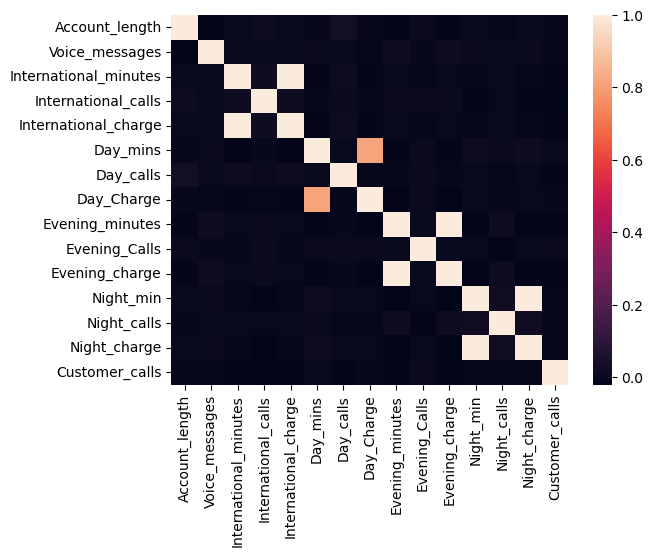

In [ ]:
sns.heatmap(numerical_columns.corr())

### From the above heatmap, we derive the following insights:
 - The correlation is 1 with itself
 - There is presence of high correlation between International_charge and International_minutes, Day_charge and Day_mins, Evening_charge and Evening_minutes, Night_charge and Night_min.
 - So common sense dictates us that us the no of minutes increases the charge will also increase. This is the reason for high correlaion
 - When we prepare a baseline model, we will deal with these highly correlated features and accordingly drop some features while model building.

In [ ]:
churn

,state,Area_Code,Account_length,Voice_plan,Voice_messages,International_plan,International_minutes,International_calls,International_charge,Day_mins,Day_calls,Day_Charge,Evening_minutes,Evening_Calls,Evening_charge,Night_min,Night_calls,Night_charge,Customer_calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [ ]:
churn['Voice_plan'].value_counts()

no     3677
yes    1323
Name: Voice_plan, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

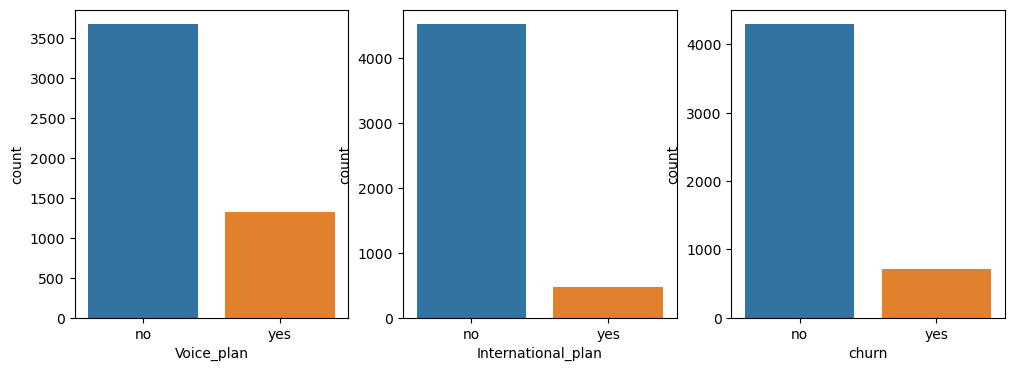

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
sns.countplot(x=churn['Voice_plan'])
plt.subplot(1,3,2)
sns.countplot(x=churn['International_plan'])
plt.subplot(1,3,3)
sns.countplot(x=churn['churn'])

In [ ]:
state_counts = churn['state'].value_counts()

<Axes: ylabel='state'>

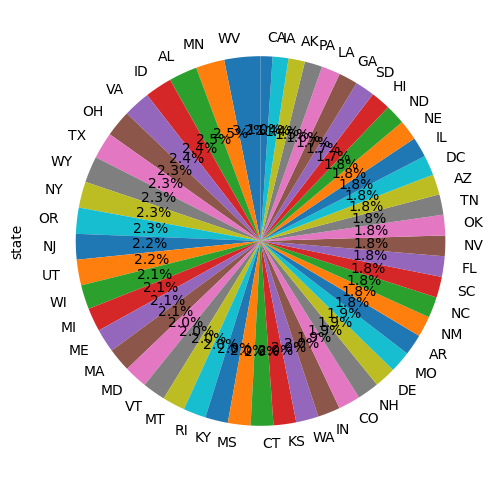

In [ ]:
plt.figure(figsize=(6, 6))
state_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

 - Though a little messy, we can infer that the the 'state' feature has equal distribution in the dataset

In [ ]:
num_cols=numerical_columns.columns

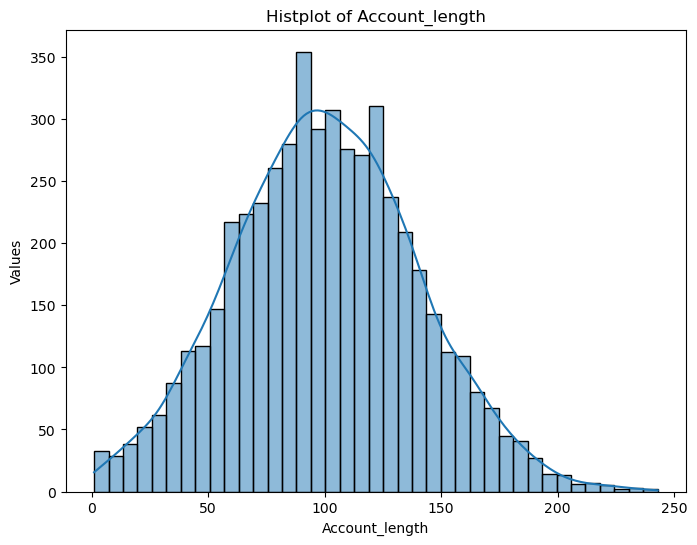

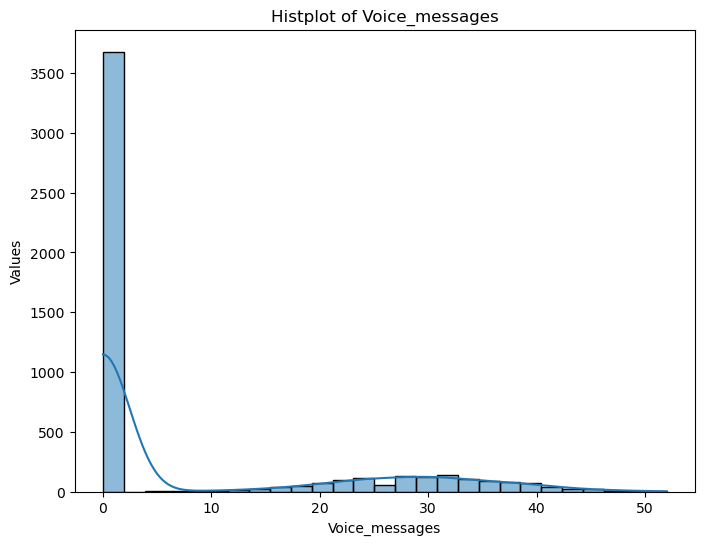

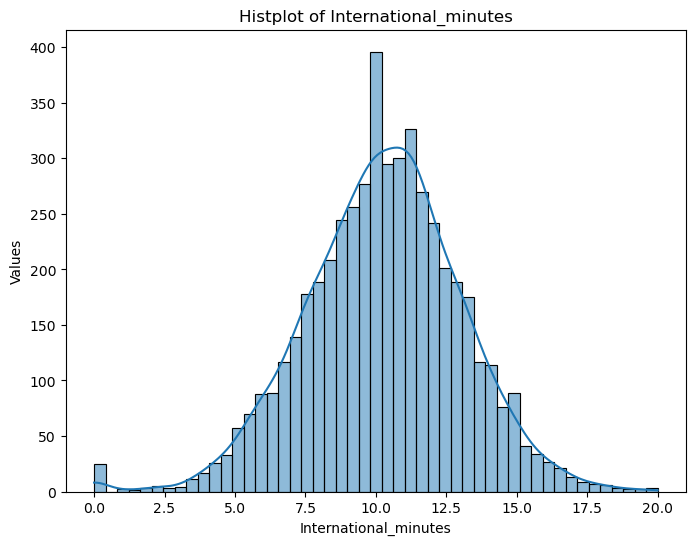

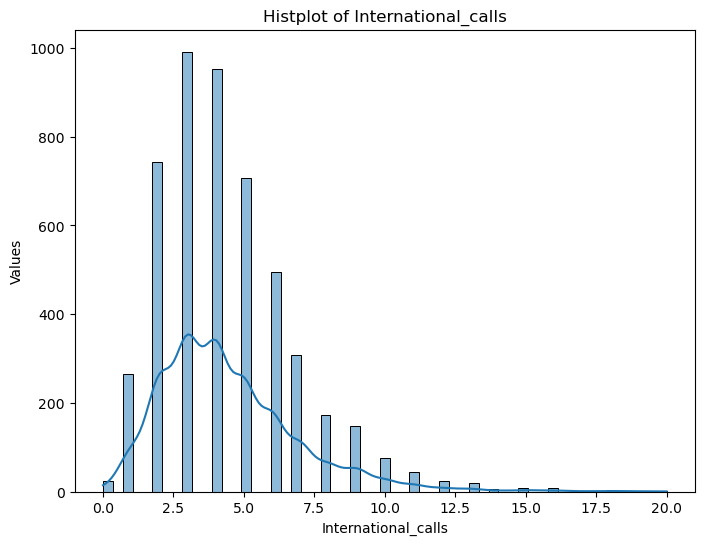

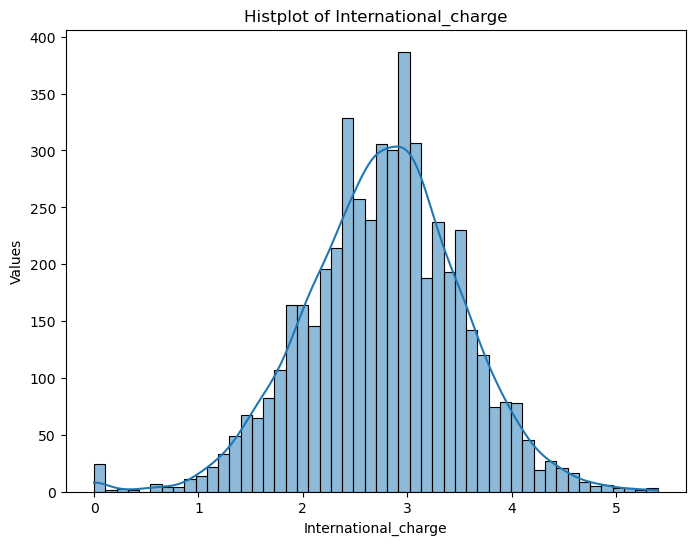

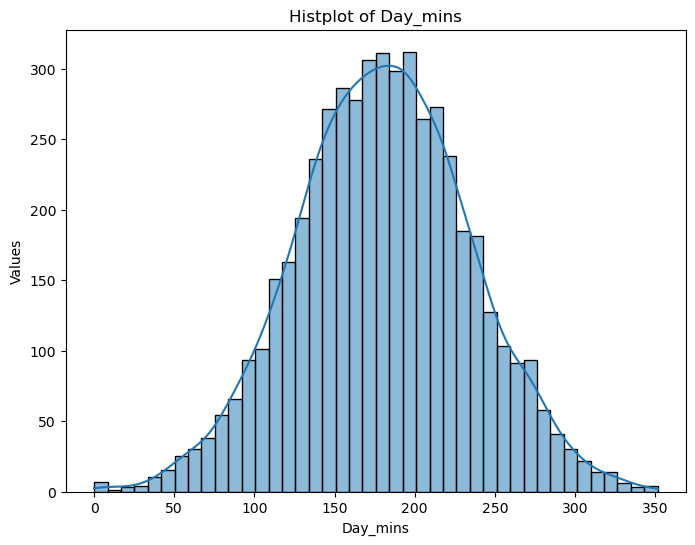

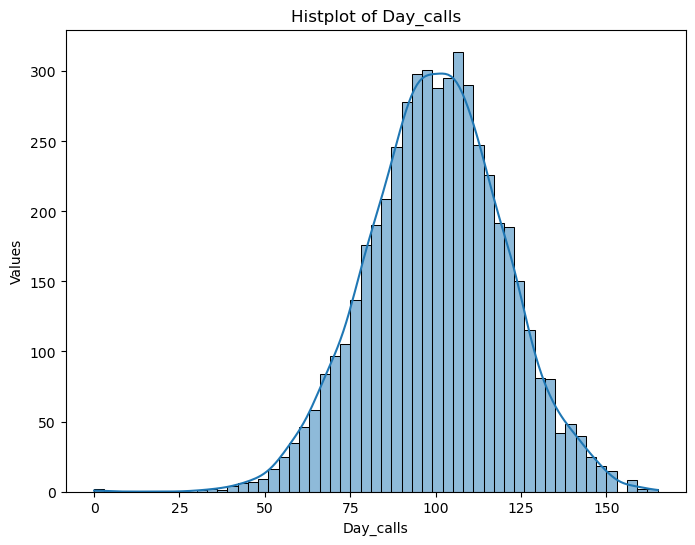

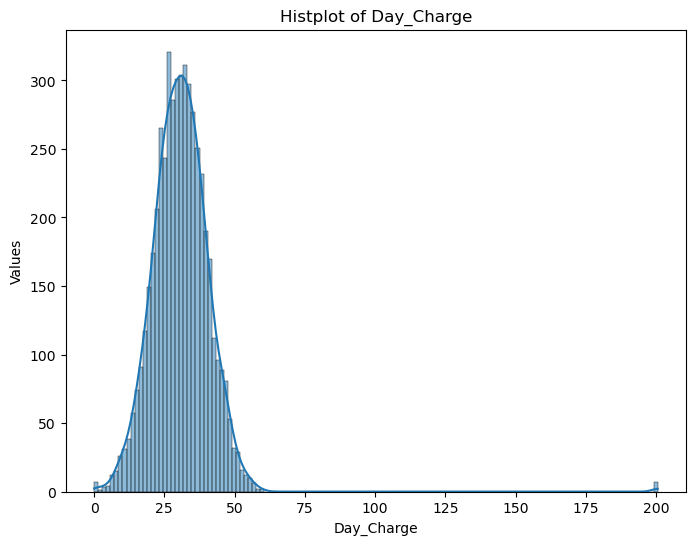

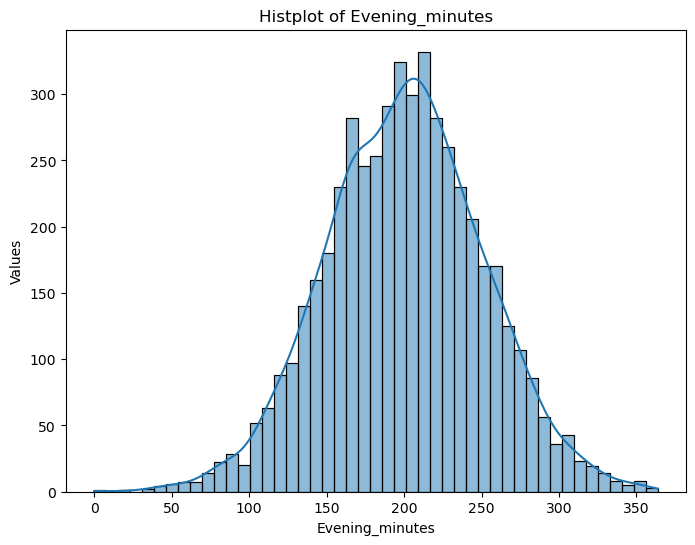

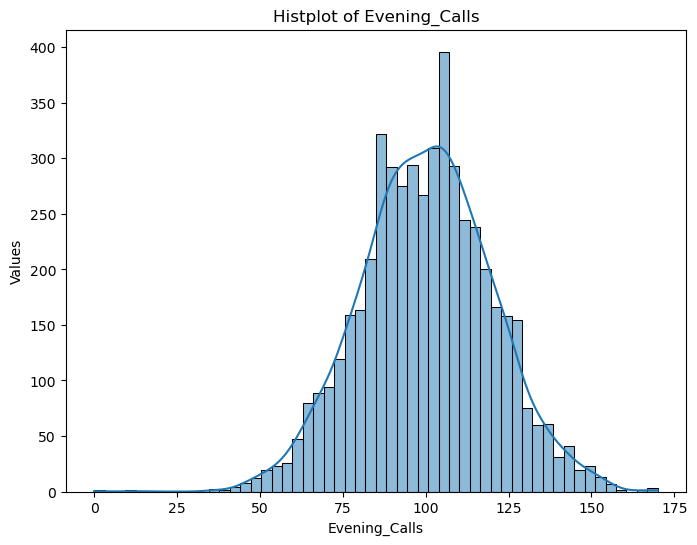

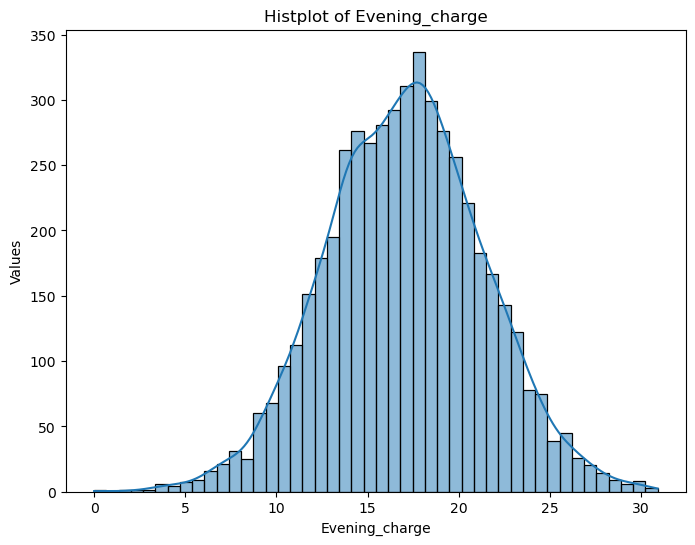

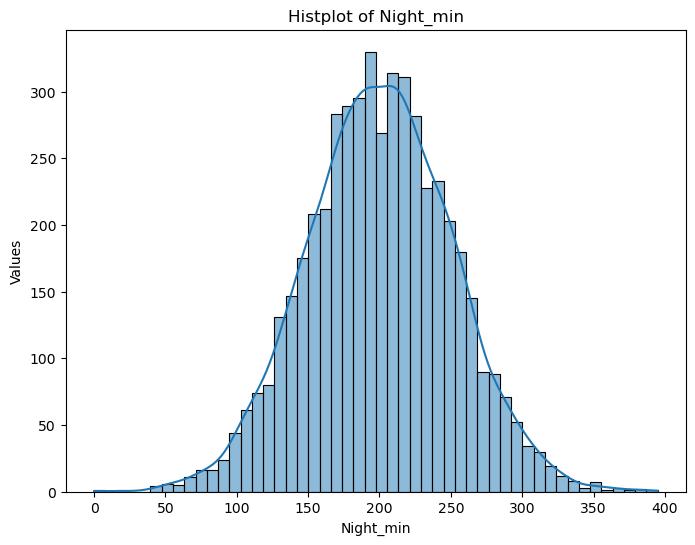

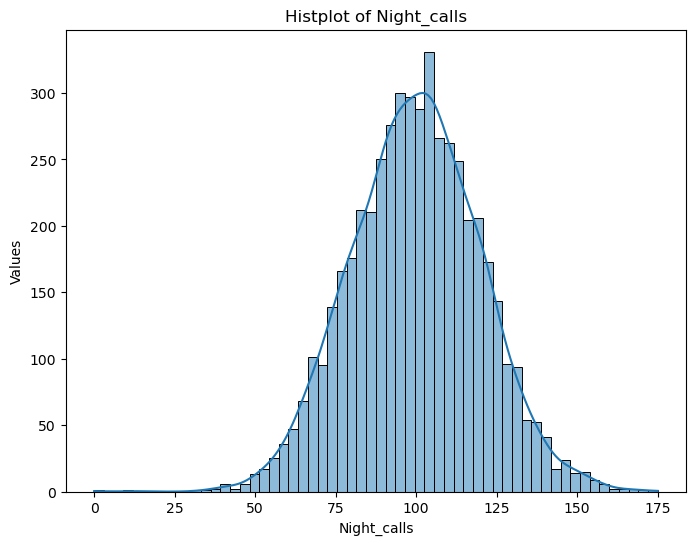

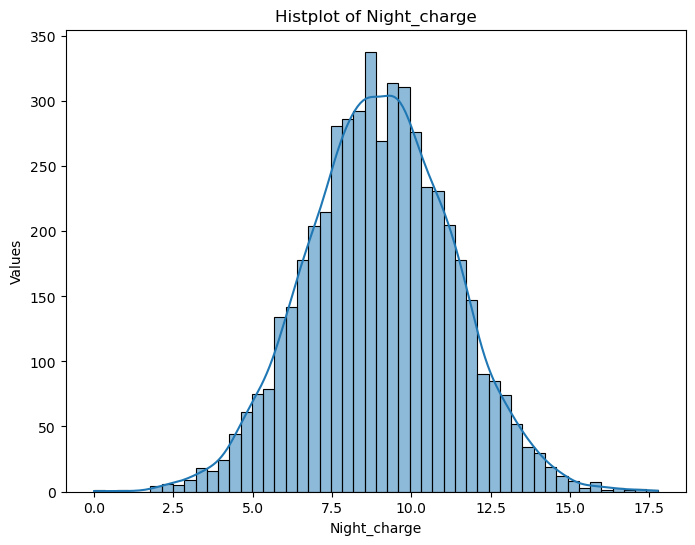

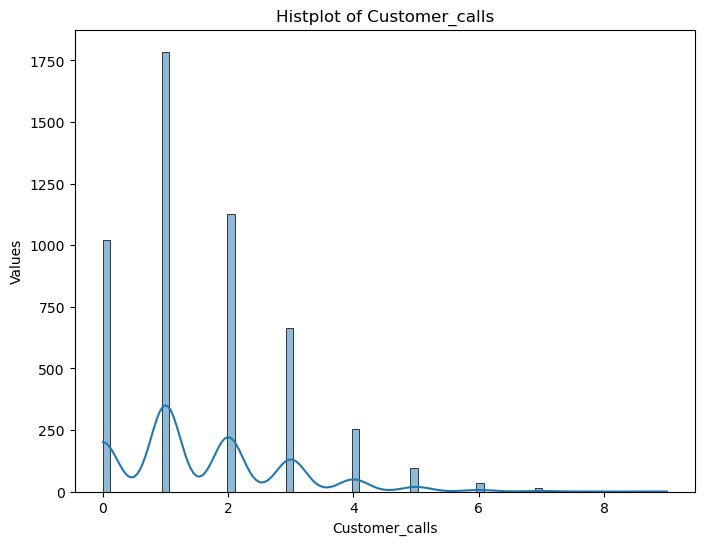

In [ ]:
for column in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(x=churn[column], kde=True)
    plt.title(f'Histplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

### From the above histplots, we can see that 'Voice_messages', 'International_calls', 'Day_Charge',Customer_calls' are skewed. We shall check the skewness.

# Feature Engineering

## 1. Outlier Detection

In [ ]:
numerical_columns = churn.select_dtypes(include='number')
num_cols=numerical_columns.columns

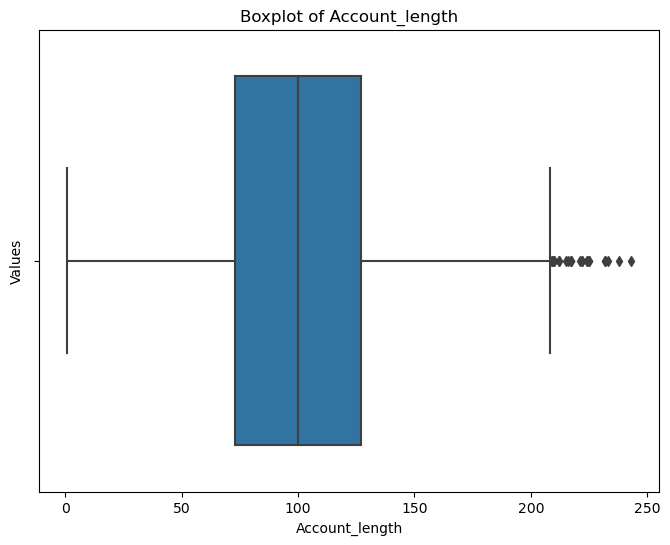

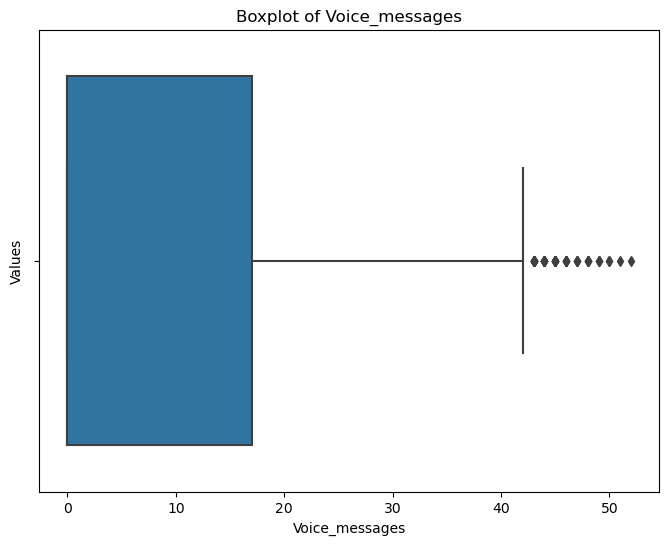

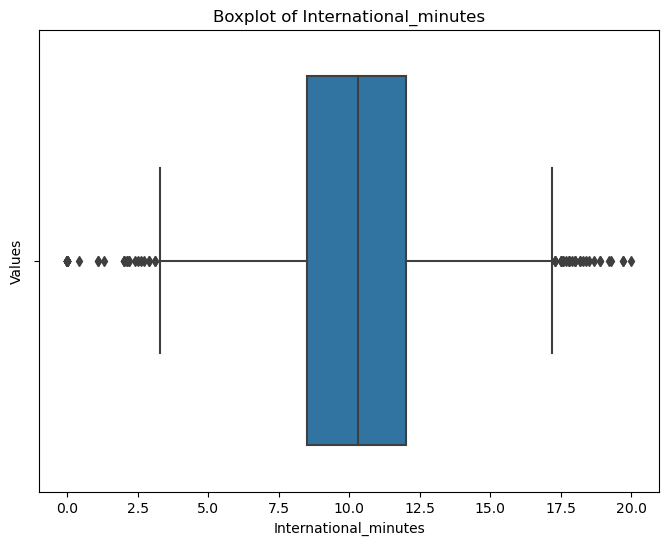

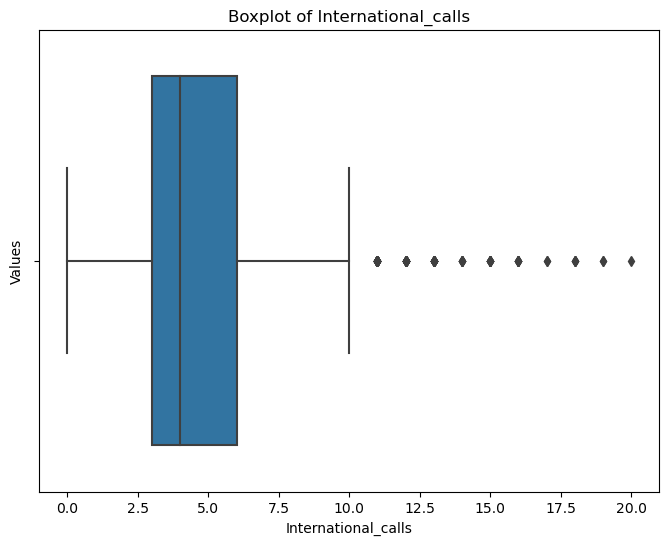

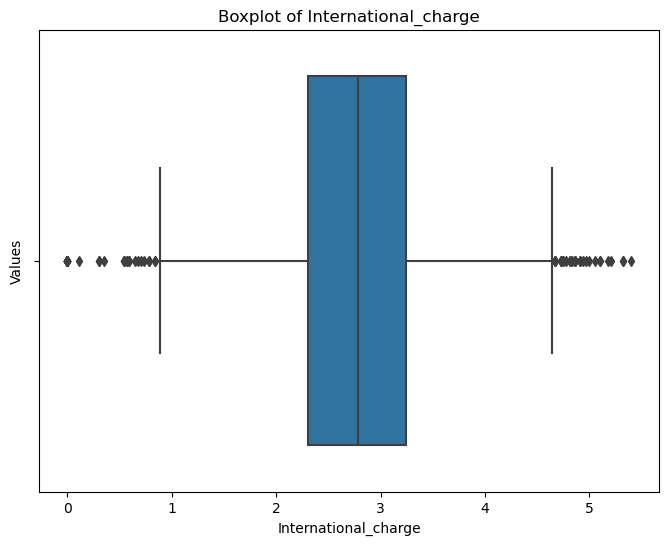

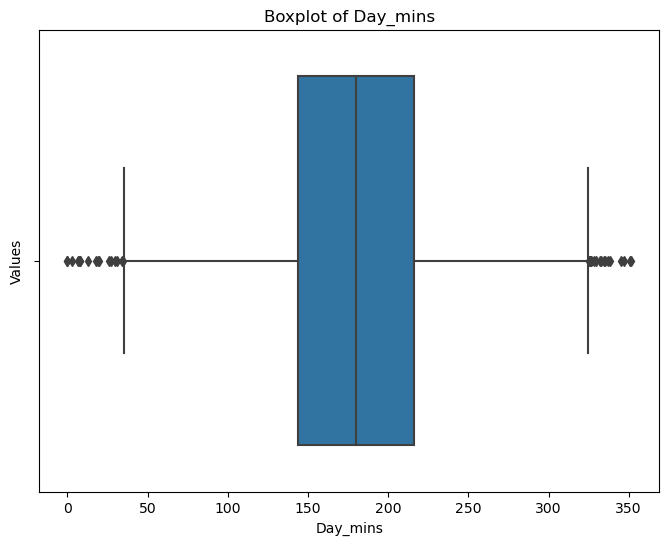

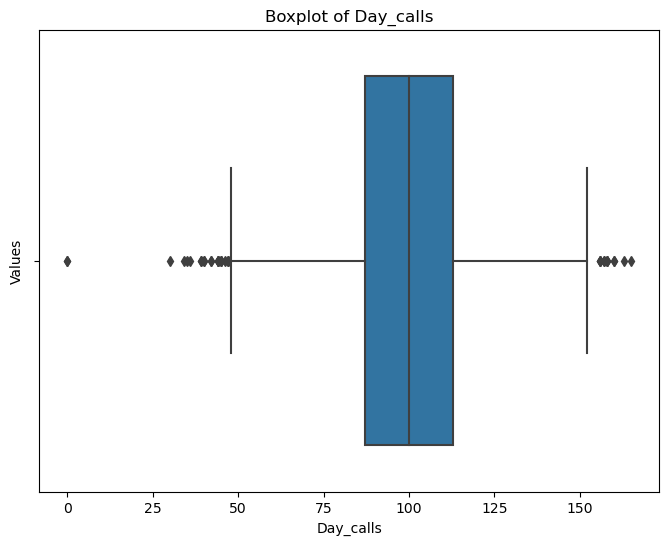

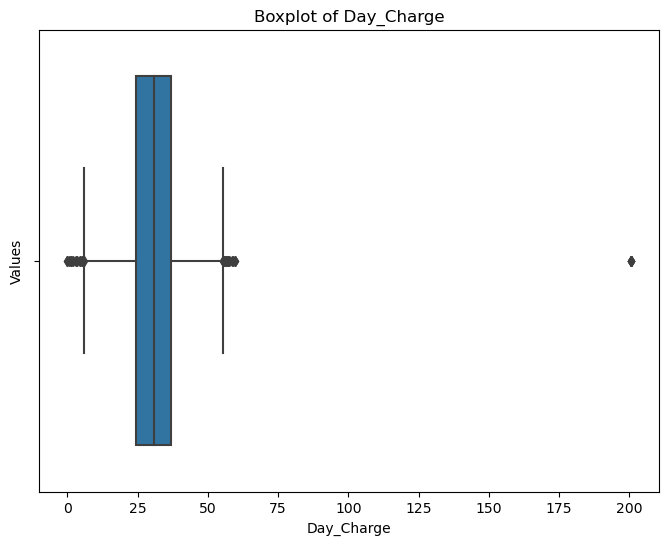

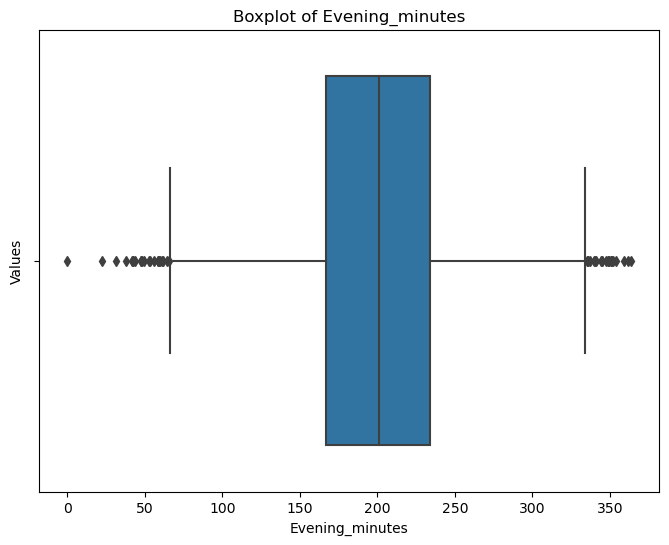

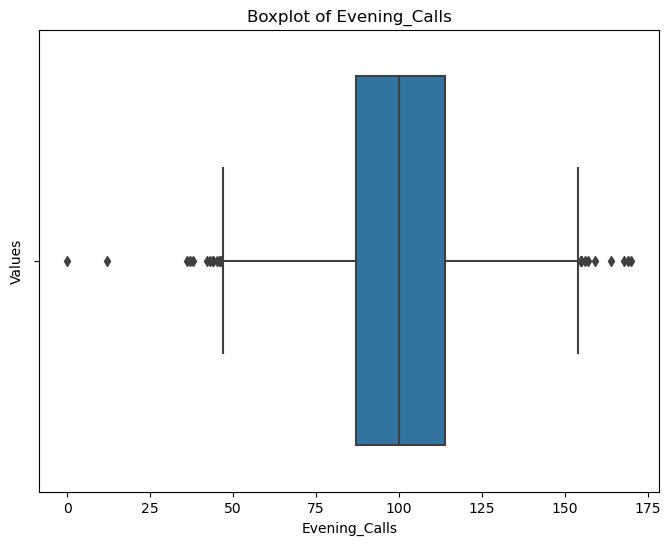

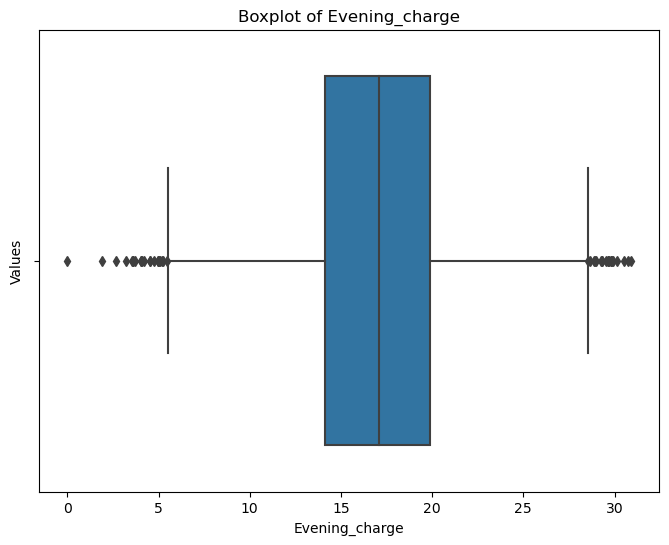

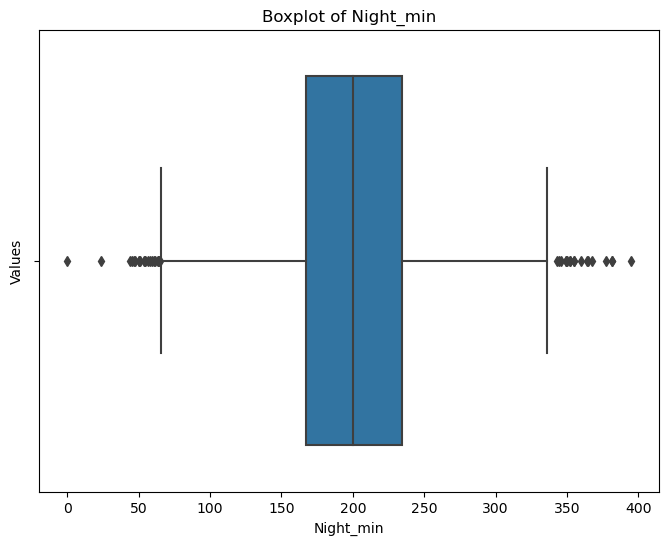

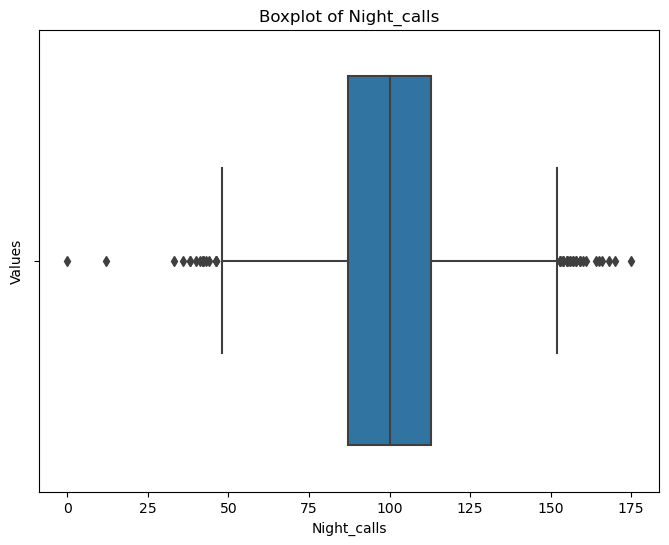

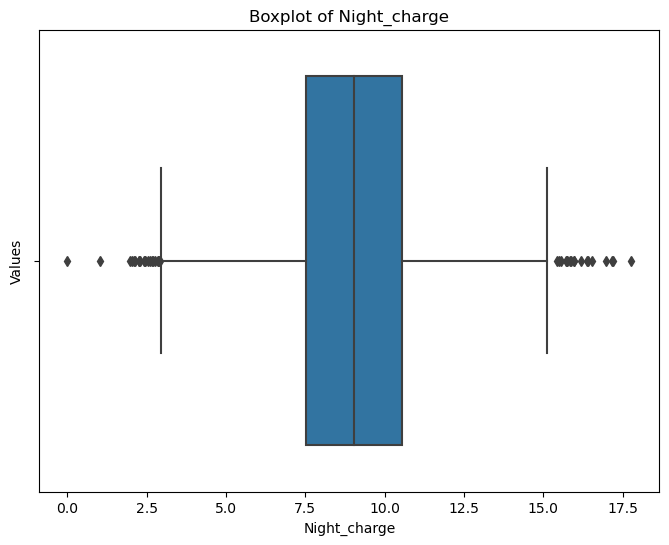

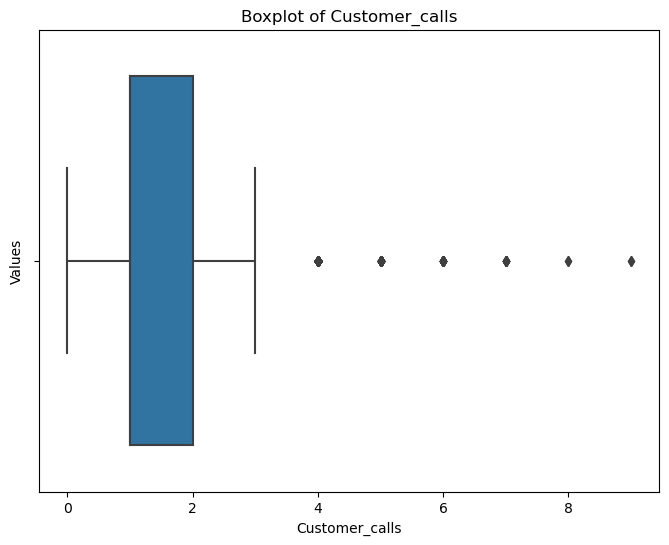

In [ ]:
for column in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=churn[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

## Analysis of Boxplots
There are a certain types of boxplots that we are getting but all of them are showing outliers. It is not recommended to remove all the outliers at once. This can alter the whole dynamics of the data. So let's study the boxplots.

### Boxplot for discrete values
Boxplots for voice messages, international calls and customer calls have lots of "zeroes" in them. These are not null values so we cannot just impute them. These are discrete values as in for a particular regions have values in them and not others and that's why we are getting such boxplots. We will keep these data as it is.
### Boxplots for highly correlated columns.
We will be performing VIF test and also finding out the correlation with the response variable and dropping one of the two correlated column. We will treat the outliers of the remaining column.
### Boxplot for Continuous values
We will treat the outliers for this category as the values are continuous and follow a normally distributed curve.

## 2. Skewness Detection

In [ ]:
churn.skew()

C:\Users\Atharva\AppData\Local\Temp\ipykernel_15480\2577693554.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn.skew()


Account_length           0.109291
Voice_messages           1.350493
International_minutes   -0.209966
International_calls      1.360692
International_charge    -0.210286
Day_mins                -0.011731
Day_calls               -0.084891
Day_Charge               4.889928
Evening_minutes         -0.012743
Evening_Calls           -0.020175
Evening_charge          -0.010990
Night_min                0.019325
Night_calls              0.002133
Night_charge             0.019287
Customer_calls           1.042462
dtype: float64

## 3. Skewness Treatment

In [ ]:
churn['Day_Charge']=np.sqrt(churn['Day_Charge'])

## 4. Variable Inflation Factor

In [ ]:
numerical_columns.columns

Index(['Account_length', 'Voice_messages', 'International_minutes',
       'International_calls', 'International_charge', 'Day_mins', 'Day_calls',
       'Day_Charge', 'Evening_minutes', 'Evening_Calls', 'Evening_charge',
       'Night_min', 'Night_calls', 'Night_charge', 'Customer_calls'],
      dtype='object')

In [ ]:
vif_data = pd.DataFrame()
# churn_temp=churn.drop('churn',axis=1)
vif_data["feature"] = numerical_columns.columns

In [ ]:
vif_data

,feature
0,Account_length
1,Voice_messages
2,International_minutes
3,International_calls
4,International_charge
5,Day_mins
6,Day_calls
7,Day_Charge
8,Evening_minutes
9,Evening_Calls


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_columns.values, i)
                          for i in range(len(numerical_columns.columns))]

In [ ]:
vif_data

,feature,VIF
0,Account_length,7.098711e+00
1,Voice_messages,1.327337e+00
2,International_minutes,1.010908e+06
3,International_calls,4.187528e+00
4,International_charge,1.011405e+06
5,Day_mins,3.568852e+01
6,Day_calls,2.202631e+01
7,Day_Charge,2.588278e+01
8,Evening_minutes,3.610062e+03
9,Evening_Calls,2.187026e+01


## 5. Encoding

In [ ]:
churn_enc=churn.copy()

In [ ]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
churn_enc["Voice_plan"]= label_encoder.fit_transform(churn_enc['Voice_plan'])
churn_enc["International_plan"]= label_encoder.fit_transform(churn_enc['International_plan'])
churn_enc["churn"]= label_encoder.fit_transform(churn_enc['churn'])

In [ ]:
churn_enc

,state,Area_Code,Account_length,Voice_plan,Voice_messages,International_plan,International_minutes,International_calls,International_charge,Day_mins,Day_calls,Day_Charge,Evening_minutes,Evening_Calls,Evening_charge,Night_min,Night_calls,Night_charge,Customer_calls,churn
0,KS,area_code_415,128,1,25,0,10.0,3,2.70,265.1,110,6.713419,197.4,99,16.78,244.7,91,11.01,1,0
1,OH,area_code_415,107,1,26,0,13.7,3,3.70,161.6,123,5.241183,195.5,103,16.62,254.4,103,11.45,1,0
2,NJ,area_code_415,137,0,0,0,12.2,5,3.29,243.4,114,6.432729,121.2,110,10.30,162.6,104,7.32,0,0
3,OH,area_code_408,84,0,0,1,6.6,7,1.78,299.4,71,7.134424,61.9,88,5.26,196.9,89,8.86,2,0
4,OK,area_code_415,75,0,0,1,10.1,3,2.73,166.7,113,5.323533,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,1,40,0,9.9,5,2.67,235.7,127,6.330087,223.0,126,18.96,297.5,116,13.39,2,0
4996,WV,area_code_415,152,0,0,0,14.7,2,3.97,184.2,90,5.595534,256.8,73,21.83,213.6,113,9.61,3,1
4997,DC,area_code_415,61,0,0,0,13.6,4,3.67,140.6,89,4.888763,172.8,128,14.69,212.4,97,9.56,1,0
4998,DC,area_code_510,109,0,0,0,8.5,6,2.30,188.8,67,5.665686,171.7,92,14.59,224.4,89,10.10,0,0


In [ ]:
correlation_coefficient = churn_enc['International_charge'].corr(churn_enc['churn'])
correlation_coefficient

0.06327531843444717

In [ ]:
correlation_coefficient2 = churn_enc['International_minutes'].corr(churn_enc['churn'])
correlation_coefficient2

0.0632848878398785

In [ ]:
correlation_coefficient3 = churn_enc['Day_Charge'].corr(churn_enc['churn'])
correlation_coefficient3

0.16185656046329702

In [ ]:
correlation_coefficient7 = churn_enc['Day_mins'].corr(churn_enc['churn'])
correlation_coefficient7

0.20770519477848007

In [ ]:
correlation_coefficient4 = churn_enc['Evening_charge'].corr(churn_enc['churn'])
correlation_coefficient4

0.0892822353204317

In [ ]:
correlation_coefficient5 = churn_enc['Evening_minutes'].corr(churn_enc['churn'])
correlation_coefficient5

0.08918034236206042

In [ ]:
correlation_coefficient6 = churn_enc['Night_charge'].corr(churn_enc['churn'])
correlation_coefficient6

0.0456725295048098

In [ ]:
correlation_coefficient8= churn_enc['Night_min'].corr(churn_enc['churn'])
correlation_coefficient8

0.04567672039250785

## 6. Hypothesis testing between categorical columns

### 1. Ho: There is no association between the two categories
### 2. Ha: There is association between the two categories

### If p<0.05, we reject the null hypothesis
### If p> 0.05, we fail to reject the null hypothesis

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(churn_enc['state'], churn_enc['Area_Code'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

In [ ]:
chi2_stat, p_val

(103.92863442802548, 0.37401028905942874)

In [ ]:
final_data=pd.get_dummies(churn_enc,columns=['Area_Code'],drop_first=True)

In [ ]:
final_data

,state,Account_length,Voice_plan,Voice_messages,International_plan,International_minutes,International_calls,International_charge,Day_mins,Day_calls,...,Evening_minutes,Evening_Calls,Evening_charge,Night_min,Night_calls,Night_charge,Customer_calls,churn,Area_Code_area_code_415,Area_Code_area_code_510
0,KS,128,1,25,0,10.0,3,2.70,265.1,110,...,197.4,99,16.78,244.7,91,11.01,1,0,1,0
1,OH,107,1,26,0,13.7,3,3.70,161.6,123,...,195.5,103,16.62,254.4,103,11.45,1,0,1,0
2,NJ,137,0,0,0,12.2,5,3.29,243.4,114,...,121.2,110,10.30,162.6,104,7.32,0,0,1,0
3,OH,84,0,0,1,6.6,7,1.78,299.4,71,...,61.9,88,5.26,196.9,89,8.86,2,0,0,0
4,OK,75,0,0,1,10.1,3,2.73,166.7,113,...,148.3,122,12.61,186.9,121,8.41,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,1,40,0,9.9,5,2.67,235.7,127,...,223.0,126,18.96,297.5,116,13.39,2,0,0,0
4996,WV,152,0,0,0,14.7,2,3.97,184.2,90,...,256.8,73,21.83,213.6,113,9.61,3,1,1,0
4997,DC,61,0,0,0,13.6,4,3.67,140.6,89,...,172.8,128,14.69,212.4,97,9.56,1,0,1,0
4998,DC,109,0,0,0,8.5,6,2.30,188.8,67,...,171.7,92,14.59,224.4,89,10.10,0,0,0,1


# Preparing Data for Model Building
1. Train Test Split
2. SMOTE Analysis
3. Baseline Model

In [ ]:
final_data.drop('state',axis=1,inplace=True)

## 1. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x= final_data.drop('churn',axis=1)
y=final_data['churn']
X_train, X_test, Y_train, Y_test= train_test_split(x,y, random_state=27, test_size=0.25)
scaler=StandardScaler()
scaler.fit(X_train)
X_trains=scaler.transform(X_train)
X_tests=scaler.transform(X_test)

<IPython.core.display.Javascript object>

## 2. SMOTE Analysis

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming you have X_train and Y_train correctly defined
# Instantiate the SMOTE object with a specified random_state
sm = SMOTE(random_state=2)

# Apply SMOTE to balance the dataset
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

### Here is a comparison pre SMOTE and post SMOTE

In [ ]:
X_train.shape

(3750, 19)

In [ ]:
X_train_res.shape

(6448, 19)

## 3. Baseline Model using OLS

In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [ ]:
logistic_model = LogisticRegression(solver='liblinear')

In [ ]:
logistic_model.fit(X_train_res, Y_train_res)


LogisticRegression(solver='liblinear')

In [ ]:
# Calculate p-values using statsmodels
X_with_intercept = sm.add_constant(X_train_res)  # Add a constant (intercept) term
logit_model = sm.Logit(Y_train_res, X_with_intercept)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.444547
         Iterations 7


In [ ]:
# Get summary statistics, including p-values
summary = result.summary()
p_values = result.pvalues
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 6448
Model:                          Logit   Df Residuals:                     6428
Method:                           MLE   Df Model:                           19
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.3587
Time:                        12:50:47   Log-Likelihood:                -2866.4
converged:                       True   LL-Null:                       -4469.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.8221      0.972      5.993      0.000       3.918       7.726
Account_length              0.0023      0.001      2.664      0.008       0.001       0.004
Voice_plan                 -5.3229      0.330    -16.129      0.000      -5.970      -4.676
Voice_messages              0.1155      0.010     11.765      0.000       0.096       0.135
International_plan          1.5087      0.120     12.597      0.000       1.274       1.743
International_minutes       1.9276      3.365      0.573      0.567      -4.668       8.524
International_calls        -0.1464      0.014    -10.189      0.000      -0.175      -0.118
International_charge       -6.7180     12.465     -0.539      0.590     -31.149      17.713
Day_mins                    0.0811      0.005     15.371      0.000       0.071       0.091
Day_calls                   0.0038      0.002      2.131      0.033       0.000       0.007
Day_Charge                 -4.2742      0.335    -12.770      0.000      -4.930      -3.618
Evening_minutes            -0.0080      0.011     -0.707      0.480      -0.030       0.014
Evening_Calls              -0.0037      0.002     -2.068      0.039      -0.007      -0.000
Evening_charge              0.1634      0.133      1.230      0.219      -0.097       0.424
Night_min                   0.7434      0.555      1.341      0.180      -0.344       1.830
Night_calls                 0.0002      0.002      0.141      0.888      -0.003       0.004
Night_charge              -16.4372     12.323     -1.334      0.182     -40.590       7.716
Customer_calls              0.5521      0.026     20.932      0.000       0.500       0.604
Area_Code_area_code_415    -1.5522      0.073    -21.365      0.000      -1.695      -1.410
Area_Code_area_code_510    -2.1340      0.100    -21.378      0.000      -2.330      -1.938
===========================================================================================
"""

In [ ]:
final_df=final_data.drop(['International_minutes','Day_Charge','Evening_minutes','Evening_Calls','Night_calls','Night_charge'],axis=1)

# Model Building

In [ ]:
x= final_df.drop('churn',axis=1)
y=final_df['churn']
X_train, X_test, Y_train, Y_test= train_test_split(x,y, random_state=27, test_size=0.25)
scaler=StandardScaler()
scaler.fit(X_train)
X_trains=scaler.transform(X_train)
X_tests=scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [ ]:
X_trains.shape

(3750, 13)

In [ ]:
X_tests.shape

(1250, 13)

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming you have X_train and Y_train correctly defined
# Instantiate the SMOTE object with a specified random_state
sm = SMOTE(random_state=2)

# Apply SMOTE to balance the dataset
X_train_res, Y_train_res = sm.fit_resample(X_trains, Y_train)

## 1. Logistic Regression

In [ ]:
logistic_model_2 = LogisticRegression(solver='liblinear')

In [ ]:
logistic_model_2.fit(X_train_res, Y_train_res)


LogisticRegression(solver='liblinear')

In [ ]:
log_pred=logistic_model_2.predict(X_test)

D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
log_classification_rep = classification_report(Y_test, log_pred)
print("Classification Report:\n", log_classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1069
           1       0.14      1.00      0.25       181

    accuracy                           0.14      1250
   macro avg       0.07      0.50      0.13      1250
weighted avg       0.02      0.14      0.04      1250



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
tree_classifier.fit(X_train_res, Y_train_res)

# Make predictions on the test data

DecisionTreeClassifier(random_state=42)

In [ ]:
Tree_pred=tree_classifier.predict(X_tests)

In [ ]:

classification_rep = classification_report(Y_test, Tree_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1069
           1       0.58      0.81      0.68       181

    accuracy                           0.89      1250
   macro avg       0.77      0.85      0.81      1250
weighted avg       0.91      0.89      0.90      1250



**Accuracy is 89%**

***3. BAGGING CLASSIFIRE MODEL***

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a BaggingClassifier with a base estimator (DecisionTreeClassifier)
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                        n_estimators=100,
                        max_samples=0.6,
                        max_features=0.7,
                        random_state=42)

# Fit the BaggingClassifier to the training data
bag.fit(X_train, Y_train)

# Make predictions on the training data
Y_pred_train = bag.predict(X_train)

# Make predictions on the testing data
Y_pred_test = bag.predict(X_test)


D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn import metrics

# Calculate and print the testing accuracy
testing_accuracy = metrics.accuracy_score(Y_test, Y_pred_test)
print("Testing accuracy: {:.4f}".format(testing_accuracy))

Testing accuracy: 0.9376


**SO THE ACCURACY OF BAGGING MODEL IS : 93.76%**

**4. RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the model on the training data
rf_classifier.fit(X_train_res, Y_train_res)

# Make predictions on the testing data
Y_pred = rf_classifier.predict(X_tests)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report to assess model performance
report = classification_report(Y_test, Y_pred)
print("Classification Report: ")
print(report)

Accuracy: 0.93
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1069
           1       0.77      0.78      0.77       181

    accuracy                           0.93      1250
   macro avg       0.86      0.87      0.87      1250
weighted avg       0.93      0.93      0.93      1250



**HERE IN THE RANDOM FOREST CLASSIFIER MODEL THE ACCURACY IS 93%**

**5. AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train, y_train, X_test, and y_test

# Create an AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the AdaBoostClassifier to the training data
adaboost_classifier.fit(X_train_res, Y_train_res)

# Make predictions on the testing data
Y_pred = adaboost_classifier.predict(X_tests)

# Calculate accuracy on the testing data
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print("Accuracy on testing data:", accuracy)

Accuracy on testing data: 0.8448


**Accuracy of adaboost model is 84.48%**

**6. XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

#fit the training data with the xgboost classifier
xgb_classifier.fit(X_train_res,Y_train_res)

#Make predictions on the testing data
y_pred = xgb_classifier.predict(X_tests)

#Calculate the accuracy on the testing data
accuracy = accuracy_score(Y_test,y_pred)

#print the accuracy
print('Accuracy on tesing data: ', accuracy)

Accuracy on tesing data:  0.9528


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(X_train_res, Y_train_res)

SVC(kernel='linear')

In [ ]:
sv_pred=clf.predict(X_tests)

In [ ]:
classification_rep = classification_report(Y_test, sv_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83      1069
           1       0.34      0.77      0.47       181

    accuracy                           0.75      1250
   macro avg       0.64      0.76      0.65      1250
weighted avg       0.86      0.75      0.78      1250



**SO WE CAN SEE THAT THE XgBoost ACCURACY IS 95.28%, WHICH IS HIGHEST OF ALL**

**Model Accuracies:**


*   **DECISION TREE CLASSIFIER=  89%**
*   **BAGGING CLAS.F =           93.76%**
*   **RANDOM FOREST MODEL =      93%**
*   **ADABOOST MODEL=            84.48%**
*   **XGBOOST MODEL =            95.28%**


In [ ]:
final_df

,Account_length,Voice_plan,Voice_messages,International_plan,International_calls,International_charge,Day_mins,Day_calls,Evening_charge,Night_min,Customer_calls,churn,Area_Code_area_code_415,Area_Code_area_code_510
0,128,1,25,0,3,2.70,265.1,110,16.78,244.7,1,0,1,0
1,107,1,26,0,3,3.70,161.6,123,16.62,254.4,1,0,1,0
2,137,0,0,0,5,3.29,243.4,114,10.30,162.6,0,0,1,0
3,84,0,0,1,7,1.78,299.4,71,5.26,196.9,2,0,0,0
4,75,0,0,1,3,2.73,166.7,113,12.61,186.9,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,5,2.67,235.7,127,18.96,297.5,2,0,0,0
4996,152,0,0,0,2,3.97,184.2,90,21.83,213.6,3,1,1,0
4997,61,0,0,0,4,3.67,140.6,89,14.69,212.4,1,0,1,0
4998,109,0,0,0,6,2.30,188.8,67,14.59,224.4,0,0,0,1


In [ ]:
final_df.columns

Index(['Account_length', 'Voice_plan', 'Voice_messages', 'International_plan',
       'International_calls', 'International_charge', 'Day_mins', 'Day_calls',
       'Evening_charge', 'Night_min', 'Customer_calls', 'churn',
       'Area_Code_area_code_415', 'Area_Code_area_code_510'],
      dtype='object')

# Deployment using Streamlit

In [ ]:
import pandas
import sklearn
import streamlit
import pickle

In [ ]:
filename= 'trained_model.sav'
pickle.dump(clf,open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))